# 수치 미분
- $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h) - f(x)}{x+h-x}$
- $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h) - f(x-h)}{2h}$
- h값을 정하는 게 중요함
- 너무 작으면 반올림의 오차가 발생
- h=1e-4가 적당

In [43]:
# version1
def numerical_gradient(f, x):
    h = 1e-4
    temp_x = np.reshape(x, -1)
    
    grad = np.zeros_like(temp_x)
    tmp_val = temp_x
       
    for idx in range(x.size):
        tmp_val = temp_x[idx]
        
        # f+h
        temp_x[idx] = tmp_val + h
        fxh1 = f(temp_x[idx])
        
        # f-h
        temp_x[idx] = tmp_val - h
        fxh2 = f(temp_x[idx])
        # gradient
        grad[idx] = (fxh1 - fxh2) / (h)
        
        # recover value
        temp_x[idx] = tmp_val
    
    return grad.reshape(x.shape)

numerical_gradient(lambda x: x**2, a)

array([[2.46993394, 3.79978351, 3.61606312],
       [1.53009958, 2.48166673, 2.52556609]])

In [81]:
# version2
def numerical_gradient(f, x):
    h = 1e-4
    temp_x = np.reshape(x, -1)
    
    grad = np.zeros_like(temp_x)
    tmp_val = temp_x
    
    fxh1 = f(tmp_val + h)
    fxh2 = f(tmp_val - h)
    
    grad = (fxh1 - fxh2) / (h)

    return grad.reshape(x.shape)
   
numerical_gradient(lambda x: x**2, a)

array([[2.46953394, 3.79978351, 3.61606312],
       [1.53009958, 2.48166673, 2.52556609]])

# 손실함수
- 평균제곱오차

In [5]:
y1 = np.array([.85, .05, .1]) # wrong
y2 = np.array([.1 , .05, .85])
t = np.array([0, 0, 1])

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

mean_squared_error(y1, t), mean_squared_error(y2, t) 

(0.7675, 0.017500000000000005)

- cross entropy

In [8]:
y1 = np.array([.1, .2, .7, 0]) # wrong
y2 = np.array([.7, .2, .1, 0])
t = np.array([0, 0, 1, 0])

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

cross_entropy_error(y1, t), cross_entropy_error(y2, t)

(0.3566748010815999, 2.302584092994546)

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # eg. (4, ) -> (1, 4)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
    # label이 1~7일 때
    #return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

# 활성화 함수
- 신호를 변환
- 반드시 비선형함수

In [91]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# no array
def step_function(x):
    if x > 0:
        return 1
    return 0

# array
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [96]:
x = np.array([-1, 1, 2])
x > 0

array([False,  True,  True])

In [97]:
step_function(x)

array([0, 1, 1])

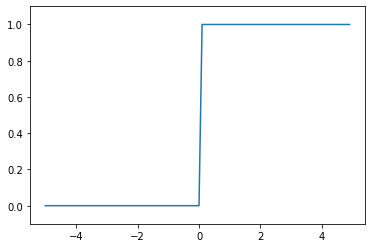

In [106]:
x = np.arange(-5, 5, .1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

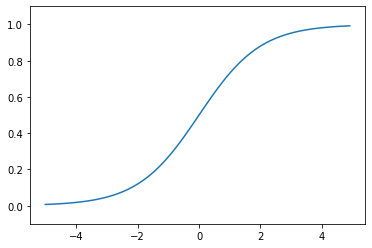

In [107]:
x = np.arange(-5, 5, .1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

# 미니배치
- 데이터 중 일부만 훈련시킴

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from book_code.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =\
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# SGD
- 벡터의 gradient를 구한다
- 벡터를 업데이트 한다
- 반복한다

In [43]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    # x0, x1, x2, x3, ...x -= lr * grad기울기 한번에 구함
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-0.3, 4.0])
numerical_gradient(function_2, init_x)
gradient_descent(function_2, init_x)

array([-0.03978587,  0.53047822])

# Simpel update

In [50]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [52]:
net = simpleNet()
print(net.W)

[[ 0.80563957 -0.5827213   1.24742612]
 [ 1.31182398  1.73793252 -0.36467726]]


In [55]:
# 2 feature 데이터 넣어서 3class 판별
x = np.array([0.6, 0.9])
p = net.predict(x)
t = np.array([0, 0, 1])
print('loss is: ', net.loss(x, t))

loss is:  1.899342031673723


In [65]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31149844  0.19870384 -0.51020228]
 [ 0.46724765  0.29805576 -0.76530342]]


# Get together

In [89]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.W = np.random.randn(2,3)
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grad = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [50]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

# Test Mnist

In [75]:
from book_code.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [ ]:
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [76]:
batch_mask = np.random.choice(train_size, batch_size)
batch_mask.shape

(100,)

In [77]:
x_train[[1,2,5]].shape

(3, 784)

In [85]:
x_train[batch_mask].shape

(100, 784)

In [90]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

ValueError: shapes (100,50) and (784,50) not aligned: 50 (dim 1) != 784 (dim 0)

# cf.

In [68]:
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
it.finished

False

In [14]:
a = np.random.rand(2,3)
it = np.nditer(a, flags=['multi_index'], op_flags=['readwrite'])
for i in it:
    print(it.multi_index)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
